In [ ]:
from ultralyticsplus import YOLO, render_result
import os
import PIL.Image


In [ ]:
# load model
model = YOLO('ultralyticsplus/yolov8s')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 10  # maximum number of detections per image



(330, 330)


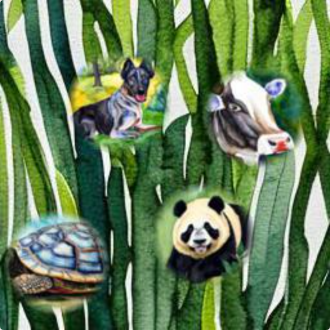


0: 640x640 2 dogs, 282.8ms
Speed: 1.0ms preprocess, 282.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


[[         73          56         158         139     0.88072          16]
 [        165         195         248         330     0.85094          16]]
[[         73          56         158         139     0.88072          16]
 [        165         195         248         330     0.85094          16]]
dog detected
[         73          56         158         139     0.88072          16]


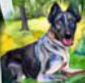

dog detected
[        165         195         248         330     0.85094          16]


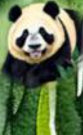

(330, 330)


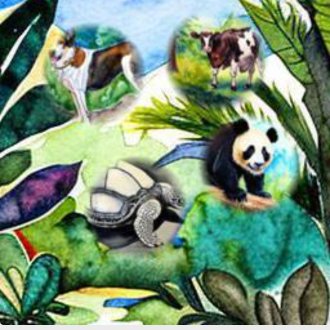


0: 640x640 2 dogs, 1 bed, 244.4ms
Speed: 1.0ms preprocess, 244.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


[[        191          26         259          91     0.72981          16]
 [        149         119         277         247     0.35574          16]
 [          1           2         327         320     0.32116          59]]
[[        191          26         259          91     0.72981          16]
 [        149         119         277         247     0.35574          16]]
dog detected
[        191          26         259          91     0.72981          16]


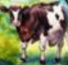

dog detected
[        149         119         277         247     0.35574          16]


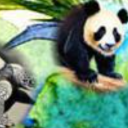

(330, 330)


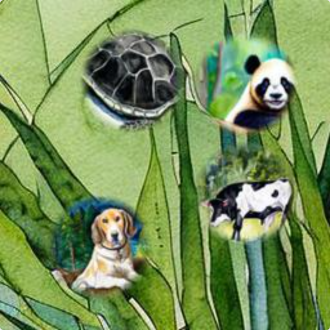


0: 640x640 1 cat, 1 dog, 1 bear, 294.2ms
Speed: 2.0ms preprocess, 294.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


[[         63         207         143         292     0.80654          16]
 [        204         178         293         242     0.26638          15]
 [        192          53         328         328     0.25372          21]]
[[         63         207         143         292     0.80654          16]]
dog detected
[         63         207         143         292     0.80654          16]


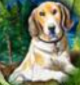

(330, 330)


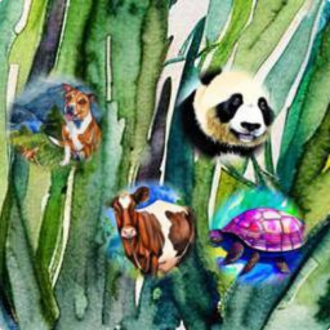


0: 640x640 1 dog, 1 teddy bear, 254.5ms
Speed: 1.0ms preprocess, 254.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


[[         60          83         102         167      0.5541          16]
 [        179          60         306         322     0.26147          77]]
[[         60          83         102         167      0.5541          16]]
dog detected
[         60          83         102         167      0.5541          16]


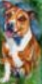

In [40]:
folder = "./src/images/v2/dog/"
paths = os.listdir(folder)
for path in paths:
    img = PIL.Image.open(folder+path)
    img = img.crop((85, 179, 415, 509))
    print(img.size)
    display(img)
    image = img

    results = model.predict(image)

    boxes = results[0].boxes.boxes.detach().numpy()
    print(boxes)

    boxes = results[0].boxes.boxes.detach().numpy()
    dogs = boxes[boxes[:,-1] == 16]
    print(dogs)
    for dog in dogs:
        print("dog detected")
        print(dog)
        display(image.crop(dog[:4]))

In [ ]:
folder = "./src/images/v2/elephant/"
paths = os.listdir(folder)
for path in paths:
    img = PIL.Image.open(folder+path)
    img = img.crop((85, 179, 415, 509))
    print(img.size)
    display(img)
    image = img

    results = model.predict(image)

    boxes = results[0].boxes.boxes.detach().numpy()
    elephants = boxes[boxes[:,-1] == 20]
    print(boxes)
    if len(elephants) > 0:
        print("elephant detected")
        print(elephants)
        display(image.crop(elephants[0][:4]))

    horses = boxes[boxes[:,-1] == 17]
    if len(horses) > 0:
        print("horse detected")
        print(horses)
        display(image.crop(horses[0][:4]))
    